**Introdução à Inteligencia Artificial**

Atividade 1

Alunos: Márcio Alexandre Silva Monteiro, Carlos Magno, Gregory

**Questão 01 e 03**

Para a modelagem do problema, tem-se as funções do problema definidas como: 
\begin{equation}
\begin{cases}
2x+y=80\\
Area = xy
\end{cases}
\end{equation}

Assim sendo, a equação geral definidora do problema $f(x)=80x-2x^2$. A primeira derivada dessa função é o ponto de máximo (ou mínimo do problema). Para esse caso, tem-se então uma única derivada para ela: $f'(x)=80-4x$
Ao considerar o modo do gradiente como $x_{k+1}=x_k-\alpha_k\nabla f(x_k)$, e um problema de minimização (tangente no mínimo), a equação a ser solucionada será $x_{k+1}=x_k-\alpha_k(-80+4x)$. 

In [ ]:
x_k_q01 = lambda x, alpha: x - alpha * (-80 +4*x)

In [ ]:
# libs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

diff = 0.000001 #diferenca para convergencia (global)
pi = math.pi
# define dark background pros graficos
plt.style.use('dark_background')
sns.color_palette()[1]

(0.996078431372549, 1.0, 0.7019607843137254)

Para o cálculo de x, consideremos o algoritmo:

In [ ]:
# alpha = alpha_k 
# grad = funcao gradiente a ser calculada
# x0 = Valor inicial de x
# f_x = qualquer funcao dependente de x
def calculateGrad(alpha, grad, x0, f_x = lambda x: x):
  y_points = list()
  x_points = list()
  y = 0
  x = x0
  convergence = diff
  while convergence >= diff:
    x_points.append(x)
    y_points.append(y)
    xk = grad(x, alpha)
    convergence = xk-x
    x = xk
    y = f_x(x)
  return len(x_points), x, y, [x_points, y_points]

Para a derivada $f'(x)=-80+4x$, aplica-se então:

In [ ]:
i, x, y, [pointsx, _] = calculateGrad(0.01, x_k_q01, 0, lambda x: 80-2*x)
print('Valor final de x após {} iterações é {} m'.format(i, x))
print('Valor final de y após {} iterações é {} m'.format(i, y))
print('O custo final após {} iterações é {:.2f} R$'.format(i, 80*x -2*x*x))


Valor final de x após 334 iterações é 19.999976032549952 m
Valor final de y após 334 iterações é 40.000047934900095 m
O custo final após 334 iterações é 800.00 R$


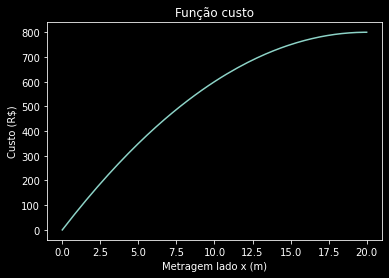

In [ ]:
# calculo pontos da funcao custo
fx = list(map(lambda x: 80*x - 2*x*x, pointsx))

plt.plot(pointsx, fx)
plt.xlabel("Metragem lado x (m)")
plt.ylabel("Custo (R$)")
plt.title("Função custo")
plt.show()

**Questão 02 e 03**

Para a modelagem do problema, tem-se as funções do problema definidas como: 
\begin{equation}
\begin{cases}
Vol_{cilindro} = πr^2h = 375\pi cm^3\\
A_{base} = \pi r^2\\
A_{lateral} = 2\pi rh\\
f(r) = 0.15A_{base}+0.05A_{lateral} = 0.15\cdot \pi r^2 + 0.1\cdot \pi rh
\end{cases}
\end{equation}

Onde $f(r)$ é a função custo definidora do problema, $h$ a altura do cilindro e $r$ o raio da base. Fazendo a substituição do valor de $h$ proveniente do rearranjo da equação do volume do cilindro, tem-se:

\begin{equation}
πr^2h = 375 \pi cm^3\\
h=\frac{375}{r^2}
\end{equation}

\begin{equation}
f(r) = 0.15\cdot \pi r^2 + 0.1\cdot \pi rh\\
f(r) = 0.15\cdot \pi r^2 + 0.1\cdot \pi r\frac{375}{r^2}\\
f(r) = 0.15\cdot \pi r^2 + 0.1\cdot \pi \frac{375}{r}
\end{equation}

A primeira derivada da função custo será: $f'(r)=0.3\pi r - \dfrac{37.5\pi}{r^2}$.
O método gradiente será: 
\begin{equation}
x_{k+1}=x_k-\alpha_k(0.3\pi x - \dfrac{37.5\pi}{x^2})
\end{equation}

In [ ]:
x_k_q02 = lambda x, alpha: x - alpha * (0.3*pi*x-((37.5*pi)/(x**2)))

In [ ]:
i, r, h, [pointsx, _] = calculateGrad(0.01, x_k_q02, 1, lambda x: (375/(pi*x**2)))
print('Valor final do raio após {} iterações é {} cm'.format(i, r))
print('Valor final da altura após {} iterações é {} cm'.format(i, h))
print('O custo final após {} iterações é {:.2f} R$'.format(i, 0.15*pi*(r**2)+37.5/r))

Valor final do raio após 374 iterações é 4.999966287676601 cm
Valor final da altura após 374 iterações é 4.774712679202989 cm
O custo final após 374 iterações é 19.28 R$


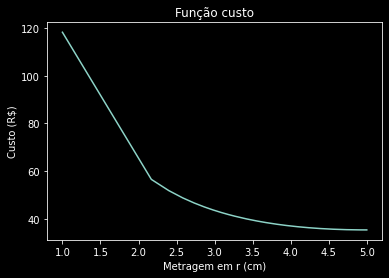

In [ ]:
# calculo pontos da funcao custo
fx = list(map(lambda x: 0.15*pi*(x**2)+37.5*pi/x, pointsx))
plt.plot(pointsx, fx)
plt.xlabel("Metragem em r (cm)")
plt.ylabel("Custo (R$)")
plt.title("Função custo")
plt.show()

**Questão 04**

Para analisar a influencia de alfa na convergencia, é possível analisar uma sequencia de valores de forma crescente:

In [ ]:
alphas = [0.00001, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5]

# Para a primeira questao
for alpha in alphas:
  i, x, _, _ = calculateGrad(alpha, x_k_q01, 0)
  print('Qtd iterações: {}; resultado {}'.format(i,x))

  

Qtd iterações: 167113; resultado 19.975001049135397
Qtd iterações: 22465; resultado 19.997501501695663
Qtd iterações: 2818; resultado 19.99975120269392
Qtd iterações: 640; resultado 19.99995150260194
Qtd iterações: 334; resultado 19.999976032549952
Qtd iterações: 70; resultado 19.999996708990885
Qtd iterações: 33; resultado 19.999999044960667
Qtd iterações: 12; resultado 19.99999991808
Qtd iterações: 2; resultado 19.2
Qtd iterações: 2; resultado 12.799999999999997
Qtd iterações: 2; resultado 7.199999999999999
Qtd iterações: 2; resultado 5.887999999999995
Qtd iterações: 2; resultado 4.512000000000008
Qtd iterações: 2; resultado 3.0720000000000027
Qtd iterações: 2; resultado 1.5679999999999978
Qtd iterações: 2; resultado 0.0


In [ ]:
# Para a segunda questao
for alpha in alphas:
  i, x, _, _ = calculateGrad(alpha, x_k_q02, 1)
  print('Qtd iterações: {}; resultado {}'.format(i,x))

Qtd iterações: 136477; resultado 4.964883039847194
Qtd iterações: 21744; resultado 4.996467665686459
Qtd iterações: 2984; resultado 4.999647623072839
Qtd iterações: 706; resultado 4.999930652877443
Qtd iterações: 374; resultado 4.999966287676601
Qtd iterações: 2; resultado 6.646656623245073
Qtd iterações: 2; resultado 11.564224157815065
Qtd iterações: 2; resultado 19.818824610417945
Qtd iterações: 2; resultado 25.891579846211474
Qtd iterações: 2; resultado 29.76741243953759
Qtd iterações: 2; resultado 30.88028661082893
Qtd iterações: 2; resultado 31.036830119914015
Qtd iterações: 2; resultado 31.171360530382767
Qtd iterações: 2; resultado 31.283876886488137
Qtd iterações: 2; resultado 31.37437830774552
Qtd iterações: 2; resultado 31.442863981669866


Observa-se que quanto menor o valor de alpha, mais passos são necessários para se chegar a uma convergência com uma diff=0.000001 mínima (constante) entre $x_{k+1}$ e $x_k$. Com valores muito baixos a convergência não é muito precisa e com valores tendendo a 0,5, percebe-se que o problema não irá convergir ($x_{k+1}$ tenderá a valores incoerentes com quantidade de iterações inconclusiva)